In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def calculate_psi(expected, actual, buckets=10):
    """
    Calculate Population Stability Index (PSI) between two distributions.
    
    Parameters:
    -----------
    expected : array-like
        Reference/training distribution
    actual : array-like
        Current/production distribution
    buckets : int
        Number of bins to discretize continuous variables
    
    Returns:
    --------
    psi_value : float
        PSI metric value
    psi_df : DataFrame
        Detailed breakdown by bucket
    """
    
    def scale_range(input_data, expected_data):
        """Scale actual data to match expected data range"""
        return input_data
    
    # Create bins based on expected distribution
    breakpoints = np.percentile(expected, np.linspace(0, 100, buckets + 1))
    breakpoints = np.unique(breakpoints)  # Remove duplicates
    
    if len(breakpoints) <= 1:
        raise ValueError("Cannot create bins - insufficient unique values")
    
    # Categorize both distributions
    expected_percents = np.histogram(expected, bins=breakpoints)[0] / len(expected)
    actual_percents = np.histogram(actual, bins=breakpoints)[0] / len(actual)
    
    # Handle zero values (add small epsilon to avoid log(0))
    epsilon = 1e-10
    expected_percents = np.where(expected_percents == 0, epsilon, expected_percents)
    actual_percents = np.where(actual_percents == 0, epsilon, actual_percents)
    
    # Calculate PSI per bucket
    psi_values = (actual_percents - expected_percents) * np.log(actual_percents / expected_percents)
    
    # Create detailed dataframe
    psi_df = pd.DataFrame({
        'Bucket': range(len(breakpoints) - 1),
        'Expected_%': expected_percents * 100,
        'Actual_%': actual_percents * 100,
        'PSI': psi_values
    })
    
    psi_value = np.sum(psi_values)
    
    return psi_value, psi_df


def interpret_psi(psi_value):
    """
    Interpret PSI value according to industry standards.
    
    PSI < 0.1: No significant change
    0.1 <= PSI < 0.2: Moderate change, investigation recommended
    PSI >= 0.2: Significant change, action required
    """
    if psi_value < 0.1:
        return "No significant drift detected"
    elif psi_value < 0.2:
        return "Moderate drift - investigation recommended"
    else:
        return "Significant drift - model retraining required"




Gradual Drift - Aircraft Maintenance Costs - Single year with very high inflation
Simulating inflation effects over time

PSI Value: 0.0320
Interpretation: No significant drift detected

   Bucket  Expected_%  Actual_%     PSI
0       0        10.0       8.5  0.0024
1       1        10.0       8.3  0.0032
2       2        10.0       8.9  0.0013
3       3        10.0       8.5  0.0024
4       4        10.0       9.1  0.0008
5       5        10.0      11.5  0.0021
6       6        10.0      10.4  0.0002
7       7        10.0      10.0  0.0000
8       8        10.0       9.9  0.0000
9       9        10.0      14.9  0.0195


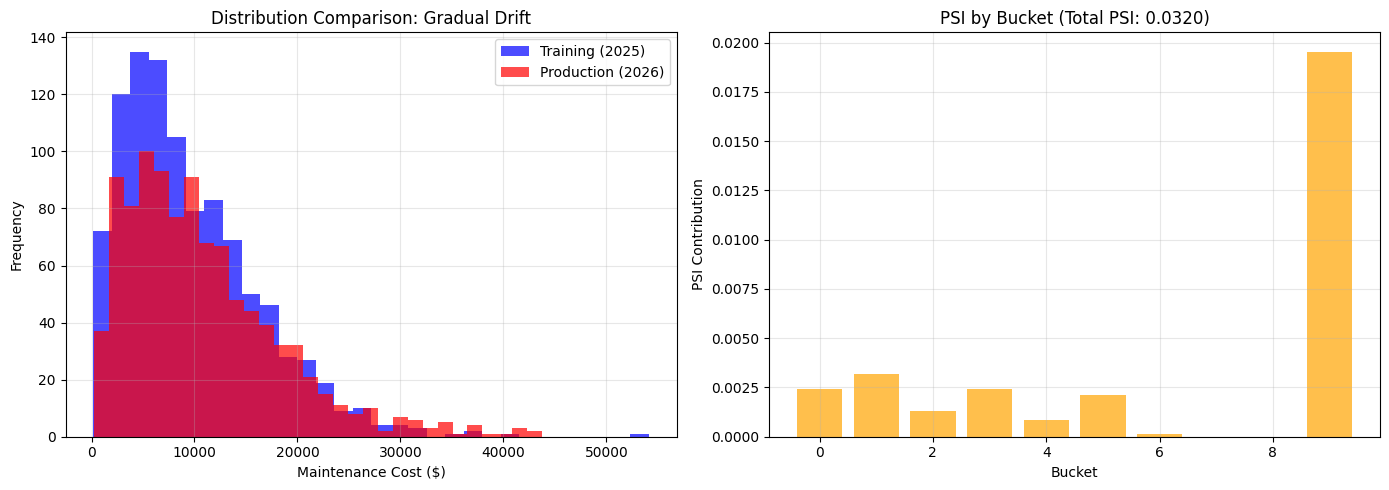

In [6]:
print("\n" + "=" * 60)
print("Gradual Drift - Aircraft Maintenance Costs - Single year with very high inflation")
print("Simulating inflation effects over time")
print("=" * 60)

# Training data: maintenance costs from 2025
expected_data = np.random.gamma(shape=2, scale=5000, size=1000)

# Production data: maintenance costs in 2024 (1 year of 9% annual inflation)
inflation_factor = 1.09 ** 1
actual_data = np.random.gamma(shape=2, scale=5000 * inflation_factor, size=1000)

psi_value, psi_df = calculate_psi(expected_data, actual_data)

print(f"\nPSI Value: {psi_value:.4f}")
print(f"Interpretation: {interpret_psi(psi_value)}\n")
print(psi_df.round(4))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(expected_data, bins=30, alpha=0.7, label='Training (2025)', color='blue')
axes[0].hist(actual_data, bins=30, alpha=0.7, label='Production (2026)', color='red')
axes[0].set_xlabel('Maintenance Cost ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution Comparison: Gradual Drift')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].bar(psi_df['Bucket'], psi_df['PSI'], color='orange', alpha=0.7)
axes[1].set_xlabel('Bucket')
axes[1].set_ylabel('PSI Contribution')
axes[1].set_title(f'PSI by Bucket (Total PSI: {psi_value:.4f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In the example above, the PSI metric failed to catch the 9% inflation in prices from one year to another. The data here is gamma distributed, so I will see if changing the shape of the gamma distribution will change the outcome. 


Abrupt Drift - Aircraft Maintenance Costs
Simulating Commander's Surge Event with no inflation

PSI Value: 5.8415
Interpretation: Significant drift - model retraining required

   Bucket  Expected_%  Actual_%     PSI
0       0        10.0       0.0  2.0723
1       1        10.0       0.0  2.0723
2       2        10.0       0.6  0.2645
3       3        10.0       0.8  0.2324
4       4        10.0       1.0  0.2072
5       5        10.0       1.7  0.1471
6       6        10.0       5.5  0.0269
7       7        10.0       6.6  0.0141
8       8        10.0      14.2  0.0147
9       9        10.0      55.9  0.7899


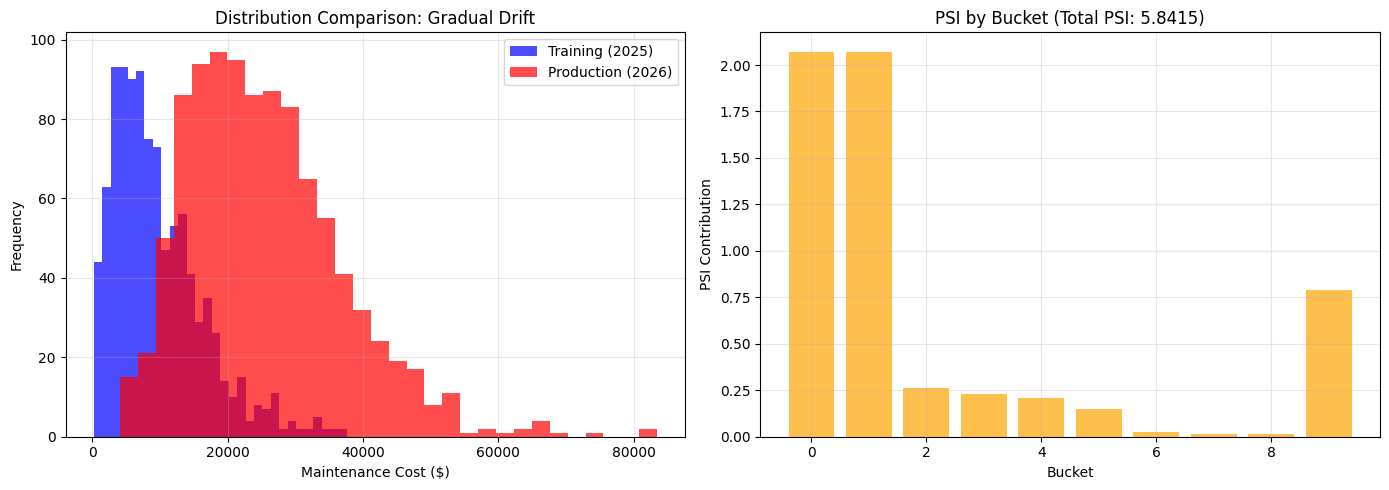

In [7]:
print("\n" + "=" * 60)
print("Abrupt Drift - Aircraft Maintenance Costs")
print("Simulating Commander's Surge Event with no inflation")
print("=" * 60)

# Training data: maintenance costs from 2025
expected_data = np.random.gamma(shape=2, scale=5000, size=1000)

# Production data: maintenance costs in 2024 (1 year of 0% annual inflation)
inflation_factor = 1.00 ** 1
#Changing the shape to simulate the changes in the type and cost of parts being ordered
actual_data = np.random.gamma(shape=5, scale=5000 * inflation_factor, size=1000)

psi_value, psi_df = calculate_psi(expected_data, actual_data)

print(f"\nPSI Value: {psi_value:.4f}")
print(f"Interpretation: {interpret_psi(psi_value)}\n")
print(psi_df.round(4))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(expected_data, bins=30, alpha=0.7, label='Training (2025)', color='blue')
axes[0].hist(actual_data, bins=30, alpha=0.7, label='Production (2026)', color='red')
axes[0].set_xlabel('Maintenance Cost ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution Comparison: Gradual Drift')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].bar(psi_df['Bucket'], psi_df['PSI'], color='orange', alpha=0.7)
axes[1].set_xlabel('Bucket')
axes[1].set_ylabel('PSI Contribution')
axes[1].set_title(f'PSI by Bucket (Total PSI: {psi_value:.4f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In this case, we can see that PSI did a great job detecting the change in shape of the distribution. 